# Import Library

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

# Using Pandas to read CSV File

In [29]:
data = pd.read_csv("water_potability.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Detect Outliers Overall

<Axes: >

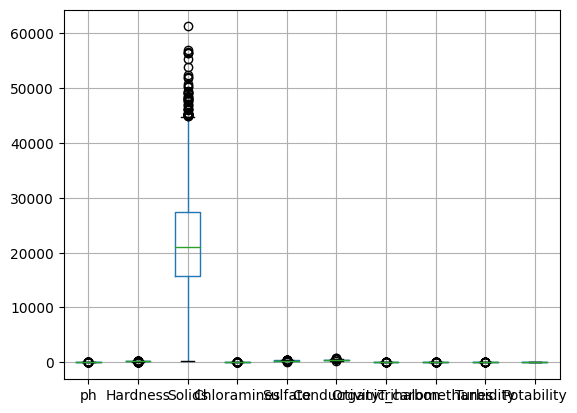

In [30]:
data.boxplot(column = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'])

# Detect Outliers for every feature

## Outliers for 'ph'

<Axes: ylabel='ph'>

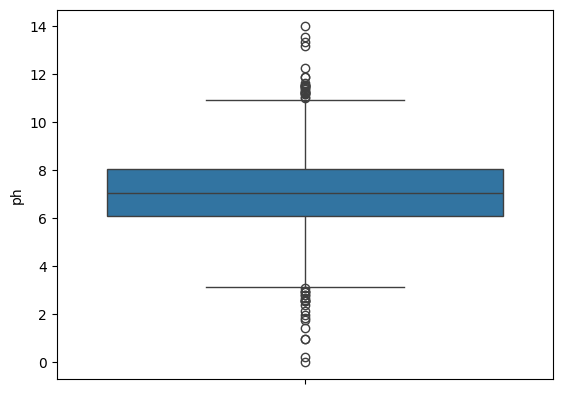

In [31]:
sns.boxplot(data=data['ph'])

<Axes: ylabel='Hardness'>

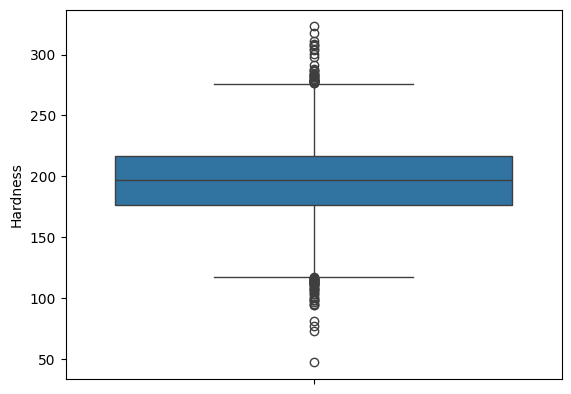

In [32]:
sns.boxplot(data=data['Hardness'])

<Axes: ylabel='Solids'>

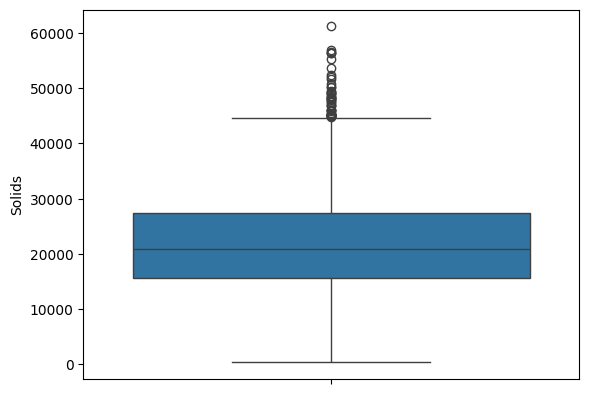

In [33]:
sns.boxplot(data=data['Solids'])

<Axes: ylabel='Chloramines'>

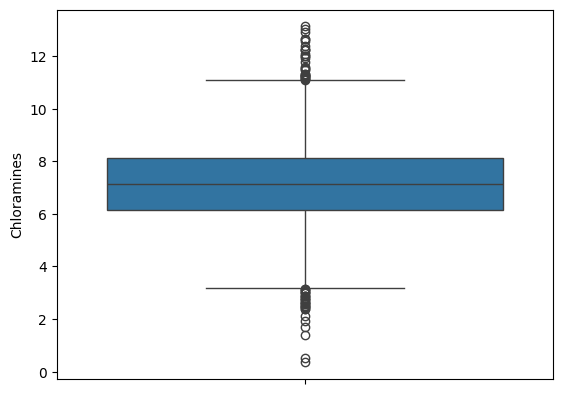

In [34]:
sns.boxplot(data=data['Chloramines'])

<Axes: ylabel='Sulfate'>

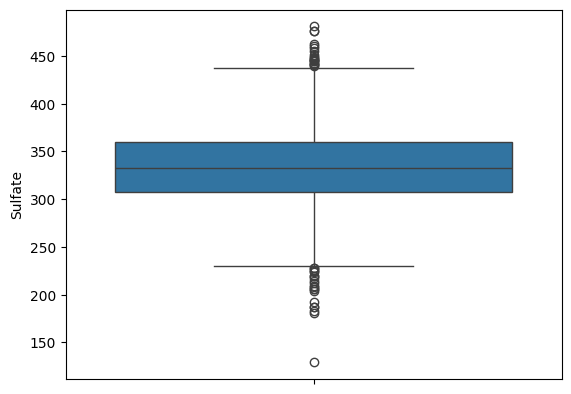

In [35]:
sns.boxplot(data=data['Sulfate'])

<Axes: ylabel='Conductivity'>

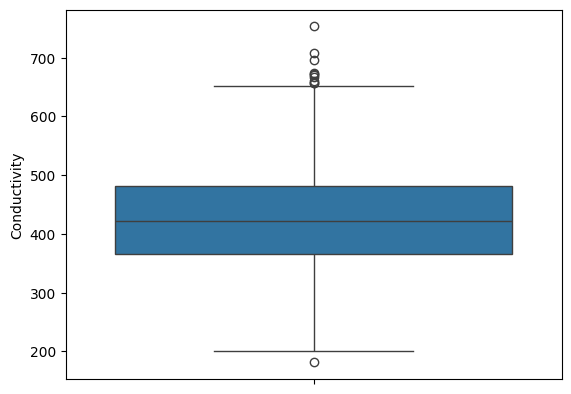

In [36]:
sns.boxplot(data=data['Conductivity'])

<Axes: ylabel='Organic_carbon'>

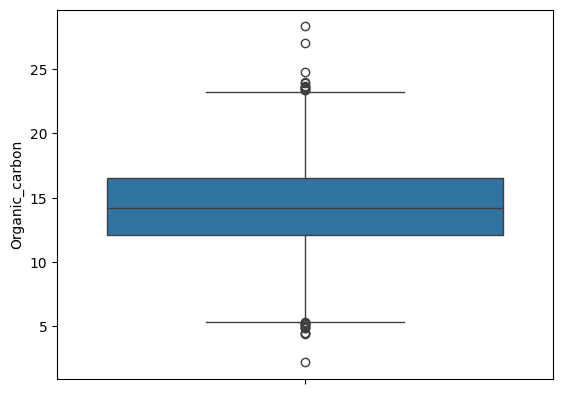

In [37]:
sns.boxplot(data=data['Organic_carbon'])

<Axes: ylabel='Trihalomethanes'>

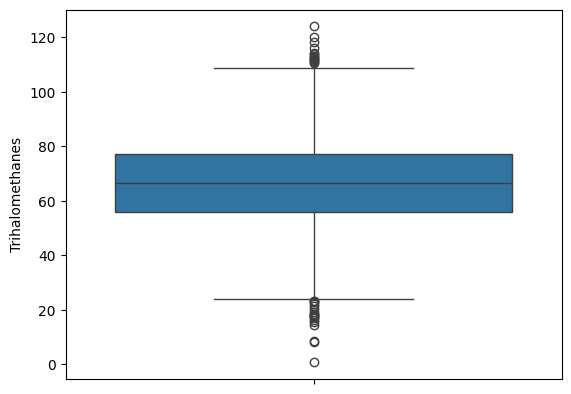

In [38]:
sns.boxplot(data=data['Trihalomethanes'])

<Axes: ylabel='Turbidity'>

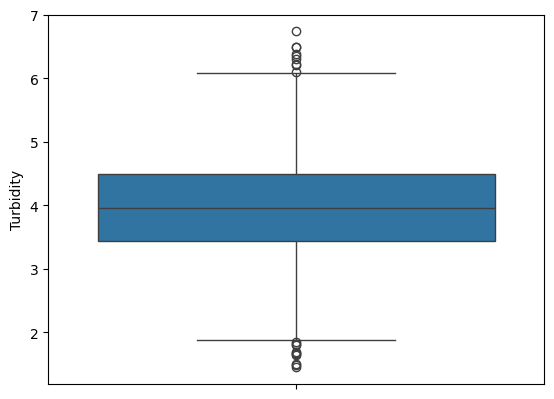

In [39]:
sns.boxplot(data=data['Turbidity'])

# Removing Outliers for each records

# IOR Technique

In [40]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]
print(data_no_outliers)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3270  6.069616  186.659040  26138.780191     7.747547  345.700257   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

# Removing missing value

In [41]:
data_cleaned = data.dropna()
print(data_cleaned)

             ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4    

# Plotting the Correlation Matrix

<Axes: >

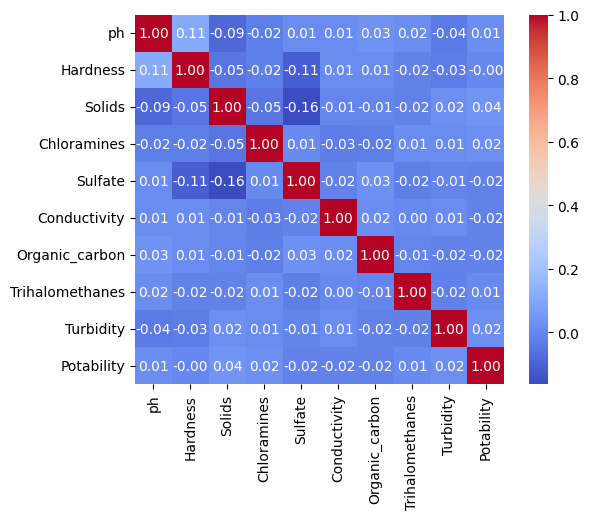

In [42]:
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Potability and other features do not have any relations => DL Problem

# Normalizing the whole dataset

In [43]:
original_data = data_cleaned.copy()
original_data.drop(columns='Potability', inplace=True)
DatasetScaler = preprocessing.StandardScaler()
# Learn the whole dataset
col_names = original_data.columns
features = original_data[col_names]
DatasetScaler.fit(features.values)
features = DatasetScaler.transform(features.values)
scaledDataFrame = pd.DataFrame(features, columns = col_names)

In [44]:
print(scaledDataFrame)

            ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.782466  0.564114  0.011687     0.583804  0.574378     -0.783962   
1     1.275463 -0.455653 -0.455835    -0.370947 -0.560480     -0.348429   
2    -0.954835 -0.234614  0.790645     0.259104 -0.158911     -1.810063   
3     1.994902  1.596951  0.790764     0.239248  1.467140     -1.770608   
4     0.985323  0.226606 -0.954313    -1.622878 -0.726179      0.595858   
...        ...       ...       ...          ...       ...           ...   
2006  1.210411  0.584770 -0.693978    -0.528284 -0.492625     -0.447578   
2007 -0.243774  0.347964 -0.540564     0.362137 -0.697038     -1.205321   
2008  2.800492 -3.100365  1.767503     1.343596 -1.803476      0.165656   
2009 -0.646160 -0.285317  0.488576     0.387023  0.302843     -0.131852   
2010 -1.537172 -0.070075  2.970287     0.020386  0.648718      1.238006   

      Organic_carbon  Trihalomethanes  Turbidity  
0           1.227032         2.111652   0.844761